# Planejamento da solução

1. Exploração dos dados visando encontrar inconsistências, tratamento de dados faltantes e possíveis insights que possam ser úteis ao time de negócios

2. Levantar hipóteses a partir da análise feita e validar as hipóteses em busca da correlações que possam ser úteis para o modelo de machine learning.

3. Preparação dos dados utlizando técnicas de rescaling e encodings.

4. Teste de vários algoritmos classificadores.

5. Avaliação dos modelos e tunning dos parametros.

6. Contabilizar a performance do modelo de Machine Learning e transformar em performance de negócio.

7. Fazer relatório respondedo as perguntas de negócio

8. Colocar modelo em produção e acessar as predições via Google Sheets

# 0.0 Imports

In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scikitplot as sckp
from IPython.core.display    import display, HTML

## 0.1 Helper Functions

In [294]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [18, 9]
    plt.rcParams['font.size'] = 24

    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    pd.set_option('display.float_format', lambda x: '%.3f' % x)
    warnings.filterwarnings('ignore')
    sns.set()
    
jupyter_settings()

def ml_metrics(model_name, y_true, pred):
    
    accuracy = m.balanced_accuracy_score(y_true, pred)
    precision = m.precision_score(y_true, pred)
    recall = m.recall_score(y_true, pred)
    f1 = m.f1_score(y_true, pred)
    kappa = m.cohen_kappa_score(y_true, pred)
    
    return pd.DataFrame({'Balanced Accuracy': np.round(accuracy, 2), 
                         'Precision': np.round(precision, 2), 
                         'Recall': np.round(recall, 2),
                         'F1': np.round(f1, 2),
                         'Kappa': np.round(kappa, 2)}, index=[model_name])


def metrics_at_k(data, model_name, k=20000):
        
    data = data.reset_index(drop=True)
    # create ranking order
    data['ranking'] = data.index + 1
    # sort clients by propensity score
    data = data.sort_values('score', ascending=False)
    # precision
    data['precision_at_k'] = data['response'].cumsum()/data['ranking']
    # recall
    data['recall_at_k'] = data['response'].cumsum()/data['response'].sum()
                            
    return pd.DataFrame({'Precision_at_k':data.loc[k, 'precision_at_k'],
                        'Recall_at_k':data.loc[k, 'recall_at_k']}, index=[model_name])

Populating the interactive namespace from numpy and matplotlib


## 0.2 Loading Data

In [295]:
df_raw = pd.read_csv('data/insurance_cross_sell.csv')
df_raw_test = pd.read_csv('data/test.csv')

# 1.0 Data Description

In [296]:
df1 = df_raw.copy()

 - **Id**: identificador único do cliente.
 
 - **Gender**: gênero do cliente.
 - **Age**: idade do cliente.
 - **Driving License**: 0, o cliente não tem permissão para dirigir e 1, o cliente tem para dirigir ( CNH – Carteira Nacional de Habilitação )
 - **Region Code**: código da região do cliente.
 - **Previously Insured**: 0, o cliente não tem seguro de automóvel e 1, o cliente já tem seguro de automóvel.
 - **Vehicle Age**: idade do veículo.
 - **Vehicle Damage**: 0, cliente nunca teve seu veículo danificado no passado e 1, cliente já teve seu veículo danificado no passado.
 - **Anual Premium**: quantidade que o cliente pagou à empresa pelo seguro de saúde anual.
 - **Policy sales channel**: código anônimo para o canal de contato com o cliente.
 - **Vintage**: número de dias que o cliente se associou à empresa através da compra do seguro de saúde.
 - **Response**: 0, o cliente não tem interesse e 1, o cliente tem interesse.

## 1.1 Droping repeated columns

In [297]:
df1 = df1.drop(columns=['id.1', 'id.2'], axis=1)

In [298]:
df1.head()

,id,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
0,7,Male,23,11.000,152.000,1,< 1 Year,Yes,0,23367.000,249,0
1,13,Female,41,15.000,14.000,1,1-2 Year,No,1,31409.000,221,0
2,18,Female,25,35.000,152.000,1,< 1 Year,No,1,46622.000,299,0
3,31,Female,26,8.000,160.000,1,< 1 Year,No,0,2630.000,136,0
4,39,Male,45,8.000,124.000,1,1-2 Year,Yes,0,42297.000,264,0


## 1.2 Data Dimensions

In [299]:
df1.shape

(381109, 12)

## 1.3 Data Types

In [300]:
df1.dtypes

id                        int64
gender                   object
age                       int64
region_code             float64
policy_sales_channel    float64
driving_license           int64
vehicle_age              object
vehicle_damage           object
previously_insured        int64
annual_premium          float64
vintage                   int64
response                  int64
dtype: object

## 1.4 Check NA

In [301]:
df1.isna().sum()

id                      0
gender                  0
age                     0
region_code             0
policy_sales_channel    0
driving_license         0
vehicle_age             0
vehicle_damage          0
previously_insured      0
annual_premium          0
vintage                 0
response                0
dtype: int64

## 1.5 Fillout Na

There are not Nan values in the dataset

## 1.6 Change Types

In [302]:
#changing the values 0 and 1 to 'yes' and 'no'. It'll help on the data description and analysis.
dic = {1:'yes', 0:'no'}

df1['driving_license'] =  df1['driving_license'].map(dic)
df1['previously_insured'] = df1['previously_insured'].map(dic)
df1['response'] = df1['response'].map(dic)

## 1.7 Descriptive Statistical

# 2.0 Feature Engineering

In [303]:
df2 = df1.copy()

# 3.0 Variables Filtering

In [304]:
df3 = df2.copy()

In [305]:
df3 = df3.drop(columns='vehicle_age', axis=1)

# 4.0 EDA

In [306]:
df4 = df3.copy()

# 5.0 Data preparation

In [307]:
df5 = df4.copy()

## 5.1 Split dataframe into training and validation dataset

In [308]:
from sklearn.model_selection import train_test_split

In [309]:
X = df5.drop(columns='response', axis=1)
y = df5['response'].copy()

In [310]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [311]:
X_performance = X_valid.copy()

## 5.2 Rescaling

In [316]:
from sklearn.preprocessing import MinMaxScaler

In [317]:
mm = MinMaxScaler()

X_train['age'] = mm.fit_transform(X_train[['age']].values)
X_valid['age'] = mm.fit_transform(X_valid[['age']].values)

X_train['region_code'] = mm.fit_transform(X_train[['region_code']].values)
X_valid['region_code'] = mm.fit_transform(X_valid[['region_code']].values)

X_train['policy_sales_channel'] = mm.fit_transform(X_train[['policy_sales_channel']].values)
X_valid['policy_sales_channel'] = mm.fit_transform(X_valid[['policy_sales_channel']].values)

X_train['annual_premium'] = mm.fit_transform(X_train[['annual_premium']].values)
X_valid['annual_premium'] = mm.fit_transform(X_valid[['annual_premium']].values)

X_train['vintage'] = mm.fit_transform(X_train[['vintage']].values)
X_valid['vintage'] = mm.fit_transform(X_valid[['vintage']].values)

## 5.3 Encoding

In [318]:
X_train['gender'] = X_train['gender'].map({'Female':0,'Male':1})
X_valid['gender'] = X_valid['gender'].map({'Female':0,'Male':1})

X_train['driving_license'] = X_train['driving_license'].map({'no':0,'yes':1})
X_valid['driving_license'] = X_valid['driving_license'].map({'no':0,'yes':1})

X_train['vehicle_damage'] = X_train['vehicle_damage'].map({'No':0,'Yes':1})
X_valid['vehicle_damage'] = X_valid['vehicle_damage'].map({'No':0,'Yes':1})

X_train['previously_insured'] = X_train['previously_insured'].map({'no':0,'yes':1})
X_valid['previously_insured'] = X_valid['previously_insured'].map({'no':0,'yes':1})

y_train = y_train.map({'no':0,'yes':1})
y_valid = y_valid.map({'no':0,'yes':1})

# 6.0 Feature Selection

In [319]:
df6 = df5.copy()

# 7.0 Machine Learning Modeling

In [320]:
df7 = df6.copy()

## 7.1 Baseline Model

In [321]:
from sklearn.dummy import DummyClassifier

In [322]:
from sklearn import metrics as m

In [323]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)
pred = dummy.predict(X_valid)
pred_proba_dummy = dummy.predict_proba(X_valid)

### Model Performance

In [324]:
df_performance_dummy = X_performance.copy()

In [325]:
df_performance_dummy['response'] = y_valid.copy()

# propensity score
df_performance_dummy['score'] = pred_proba_dummy[:, 1].tolist()

# compute metrics at K
df_metrics_dummy = metrics_at_k(df_performance_dummy, 'dummy', k=20000)

In [326]:
dummy_results = ml_metrics('dummy', y_valid, pred)
dummy_results

,Balanced Accuracy,Precision,Recall,F1,Kappa
dummy,0.500,0.000,0.000,0.000,0.000


### Cumulative Gain Curve

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

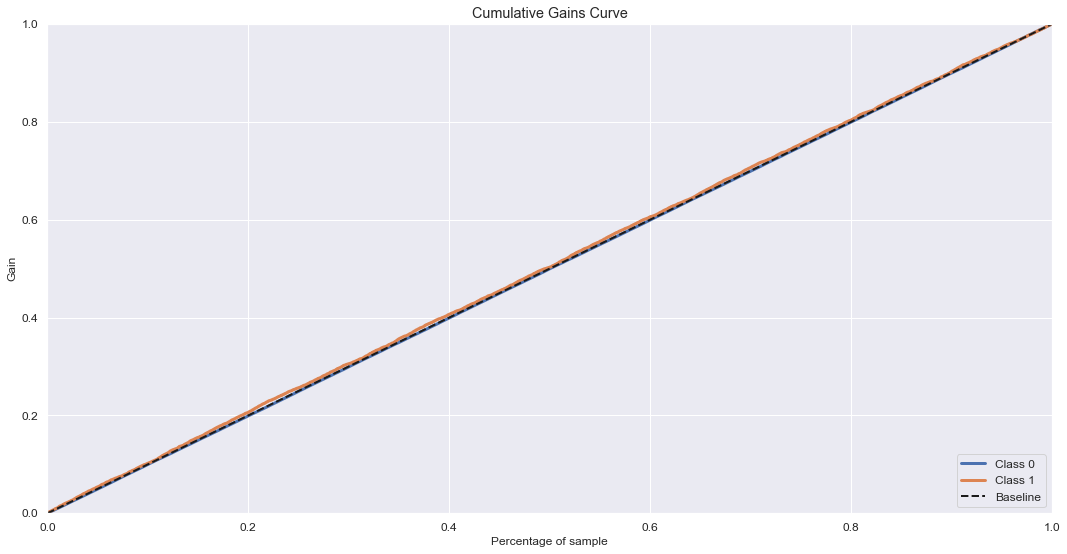

In [327]:
sckp.metrics.plot_cumulative_gain(y_valid, pred_proba_dummy)

## 7.2 Logistic Regression

In [328]:
from sklearn.linear_model import LogisticRegression

In [329]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_valid)
pred_proba_lr = lr.predict_proba(X_valid)

### Model Performance

In [330]:
df_performance_lr = X_performance.copy()

In [331]:
df_performance_lr['response'] = y_valid.copy()
df_performance_lr['score'] = pred_proba_lr[:, 1].tolist()
df_metrics_lr = metrics_at_k(df_performance_lr, 'Logistic REegression', k=20000)

In [332]:
logistic_regression_results = ml_metrics('Logistic Regression', y_valid, pred)
logistic_regression_results

,Balanced Accuracy,Precision,Recall,F1,Kappa
Logistic Regression,0.500,0.000,0.000,0.000,0.000


### Cumulative Gain Curve

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

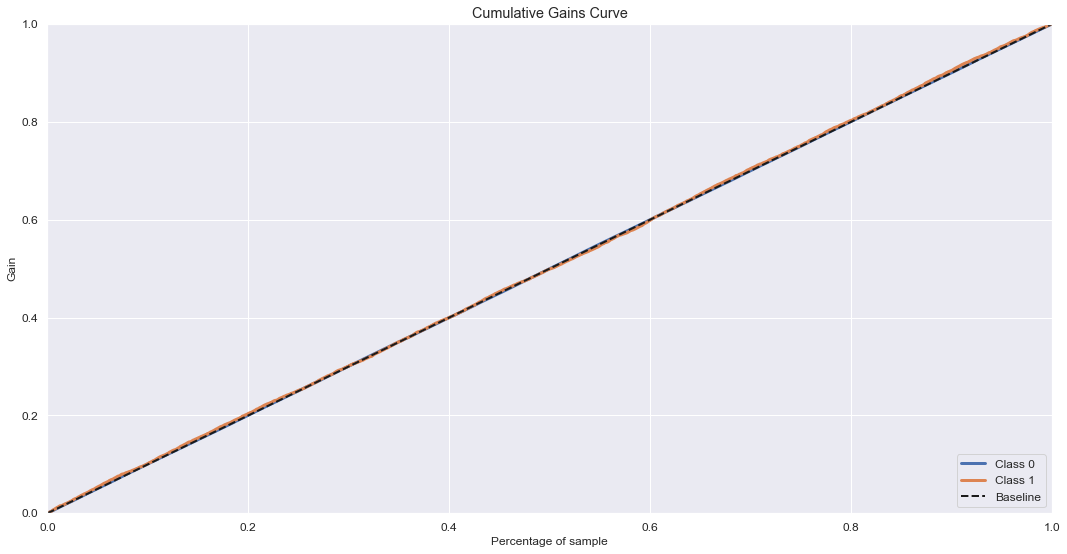

In [333]:
sckp.metrics.plot_cumulative_gain(y_valid, pred_proba_lr)

## 7.3 KNN

In [334]:
from sklearn.neighbors import KNeighborsClassifier

In [335]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
pred = knn.predict(X_valid)
pred_proba_knn = knn.predict_proba(X_valid)

### Model Performance

In [336]:
df_performance_knn = X_performance.copy()

In [337]:
df_performance_knn['response'] = y_valid.copy()

df_performance_knn['score'] = pred_proba_knn[:, 1].tolist()
df_metrics_knn = metrics_at_k(df_performance_knn, 'KNN',  k=20000)

In [338]:
knn_results = ml_metrics('KNN', y_valid, pred)
knn_results 

,Balanced Accuracy,Precision,Recall,F1,Kappa
KNN,0.500,0.150,0.020,0.030,0.010


### Cumulative Gain Curve

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

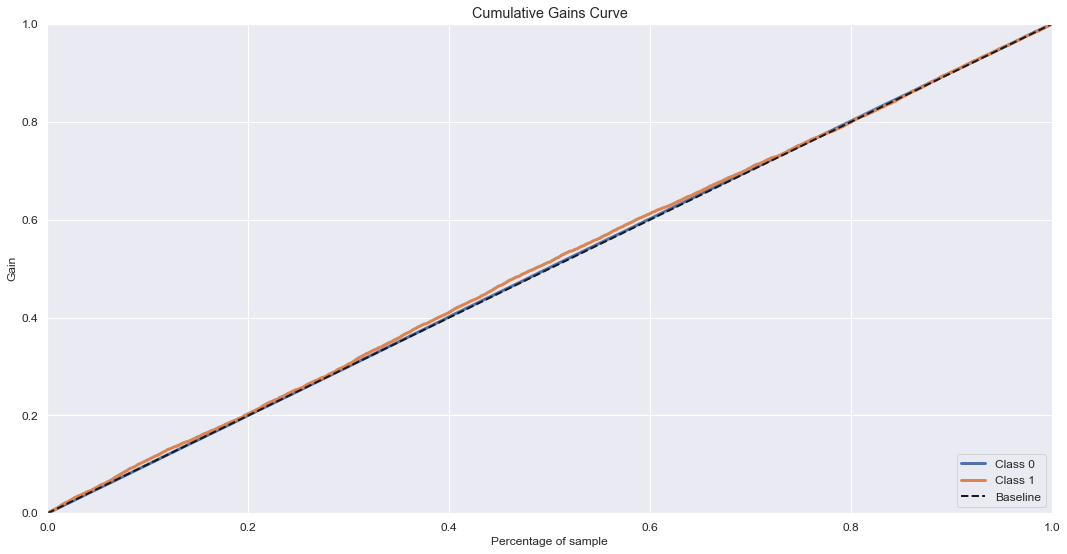

In [339]:
sckp.metrics.plot_cumulative_gain(y_valid, pred_proba_knn)

## 7.5 LightGBM

In [340]:
import lightgbm 

In [341]:
lgb = lightgbm.LGBMClassifier(objective='binary', class_weight='balanced')
lgb.fit(X_train, y_train)
pred = lgb.predict(X_valid)
pred_proba_lgb = lgb.predict_proba(X_valid)

### Model Performance

In [342]:
df_performance_lgb = X_performance.copy()

In [343]:
df_performance_lgb['response'] = y_valid.copy()

df_performance_lgb['score'] = pred_proba_lgb[:, 1].tolist()
df_metrics_lgb = metrics_at_k(df_performance_lgb, 'LGBM', k=20000)

In [344]:
lgbm_results = ml_metrics('LGBM', y_valid, pred)
lgbm_results 

,Balanced Accuracy,Precision,Recall,F1,Kappa
LGBM,0.800,0.280,0.930,0.430,0.300


### Cumulative Gain Curve

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

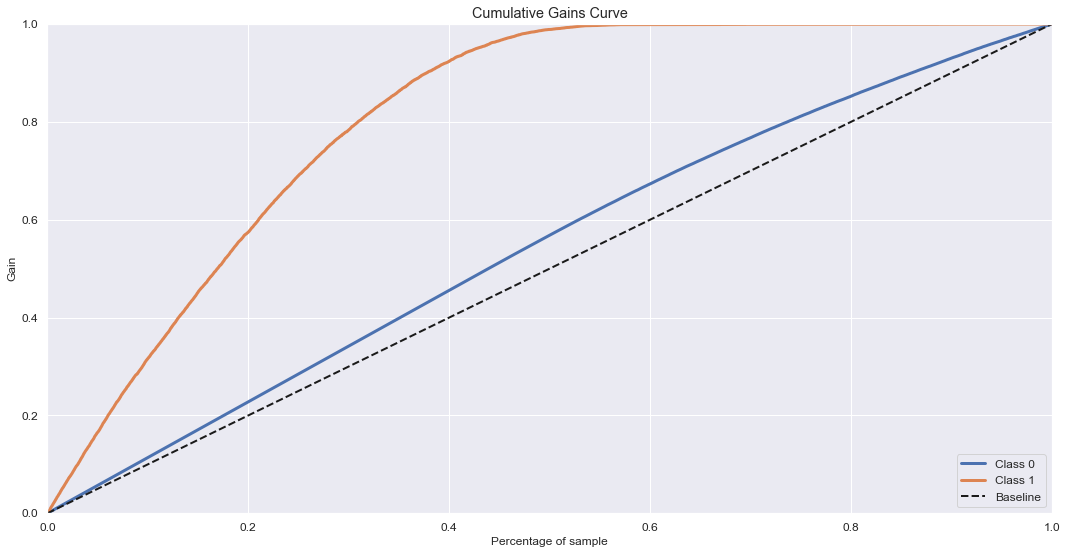

In [345]:
sckp.metrics.plot_cumulative_gain(y_valid, pred_proba_lgb)

## 7.6 Random Forest

In [346]:
from sklearn.ensemble import RandomForestClassifier

In [347]:
rf = RandomForestClassifier(class_weight='balanced', n_estimators=1000, n_jobs=-1)

In [348]:
rf.fit(X_train, y_train)
pred = rf.predict(X_valid)
pred_proba_rf = rf.predict_proba(X_valid)

### Model Performance

In [349]:
df_performance_rf = X_performance.copy()

df_performance_rf['response'] = y_valid.copy()

df_performance_rf['score'] = pred_proba_rf[:, 1].tolist()

df_metrics_rf = metrics_at_k(df_performance_rf, 'Random Forest', k=20000)

In [350]:
rf_results = ml_metrics('Random Forest', y_valid, pred)
rf_results

,Balanced Accuracy,Precision,Recall,F1,Kappa
Random Forest,0.520,0.370,0.040,0.080,0.050


### Cumulative Gain Curve

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

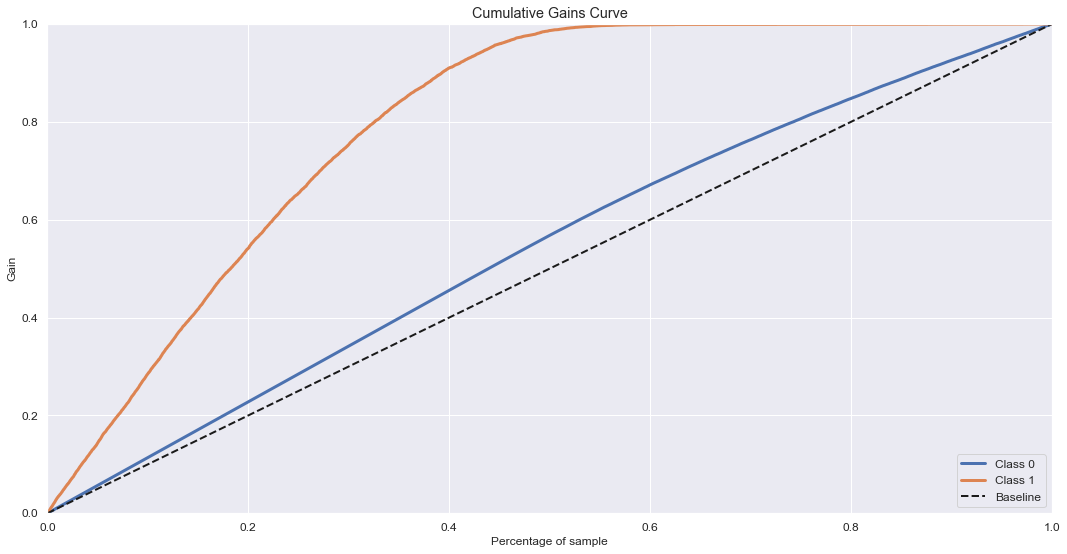

In [351]:
sckp.metrics.plot_cumulative_gain(y_valid, pred_proba_rf)

## 7.7 XGBoost

In [352]:
from xgboost import XGBClassifier

In [353]:
xgb = XGBClassifier(objective='binary:logistic', verbosity=0)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_valid)
pred_proba_xgb = xgb.predict_proba(X_valid)

### Model Performance

In [354]:
df_performance_xgb = X_performance.copy()

df_performance_xgb['response'] = y_valid.copy()

df_performance_xgb['score'] = pred_proba_xgb[:, 1].tolist()
df_metrics_xgb = metrics_at_k(df_performance_xgb, 'XGBoost', k=20000)

In [355]:
xgb_results = ml_metrics('XGBoost', y_valid, pred)
xgb_results

,Balanced Accuracy,Precision,Recall,F1,Kappa
XGBoost,0.510,0.420,0.020,0.030,0.020


### Cumulative Gain Curve

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

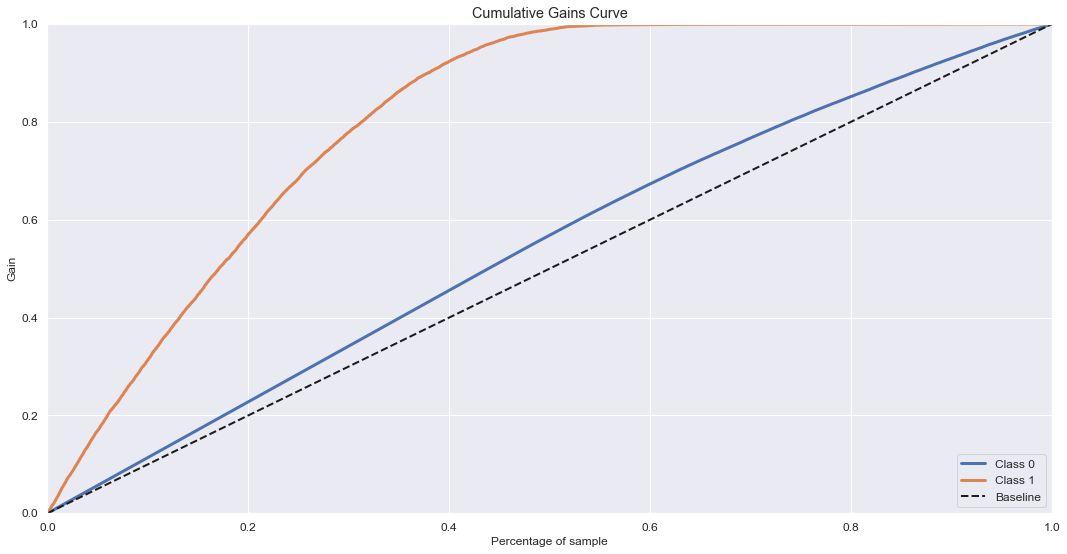

In [356]:
sckp.metrics.plot_cumulative_gain(y_valid, pred_proba_xgb)

## 7.8 Results

### Results at K

In [357]:
df_results_at_k = pd.concat([df_metrics_dummy, df_metrics_lr, df_metrics_knn, df_metrics_lgb, df_metrics_rf, df_metrics_xgb])
df_results_at_k.style.highlight_max(color='lightgreen', axis=0)

,Precision_at_k,Recall_at_k
dummy,0.424829,0.909548
Logistic REegression,0.078396,0.167844
KNN,0.208540,0.446478
LGBM,0.311834,0.667630
Random Forest,0.356082,0.762364
XGBoost,0.345483,0.739670


### Results Regular Metrics

In [358]:
df_results = pd.concat([dummy_results, logistic_regression_results, knn_results,lgbm_results, rf_results, xgb_results])
df_results.style.highlight_max(color='lightgreen', axis=0)

,Balanced Accuracy,Precision,Recall,F1,Kappa
dummy,0.500000,0.000000,0.000000,0.000000,0.000000
Logistic Regression,0.500000,0.000000,0.000000,0.000000,0.000000
KNN,0.500000,0.150000,0.020000,0.030000,0.010000
LGBM,0.800000,0.280000,0.930000,0.430000,0.300000
Random Forest,0.520000,0.370000,0.040000,0.080000,0.050000
XGBoost,0.510000,0.420000,0.020000,0.030000,0.020000


# 8.0 Hyperparameter Fine Tuning

# 9.0 Conclusions

# 10.0 Deploy